In [55]:
import numpy as np
from optimizers import Optimizer
import matplotlib.pyplot as plt

%matplotlib inline


In [56]:
alpha: float = 3829.25  # Constant
beta: float = 1  # Variable

# Heuristic
f = lambda x: -alpha * x / (x**2 + 1) + beta / x

optimizer = Optimizer(f, "Heuristic approach", alpha=0.001)
# Increased the learning rate for this application.

print(optimizer)

all_points = []

Optimizer: Heuristic approach


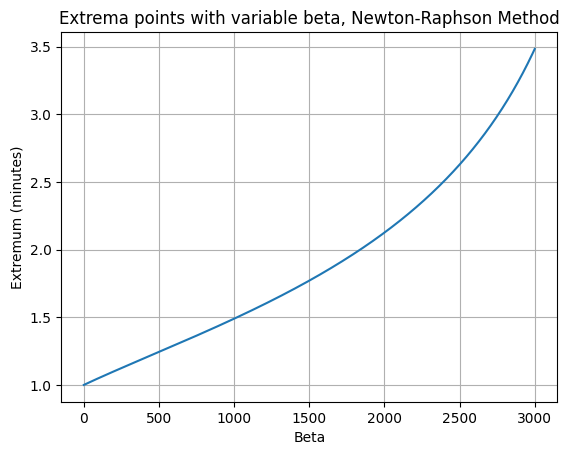

In [57]:
# Optimization with newtons method
extrema_list = []

for i in range(1, 3000):
    beta = i
    optimizer.optimize("newton", 1.3, iterations=15)
    # Adjusted the initial point.
beta = 1
    
extrema_list = [e.get() for e in optimizer.extrema()]
all_points.append(extrema_list.copy())

plt.plot([i for i in range(1, 3000)], extrema_list)
plt.title("Extrema points with variable beta, Newton-Raphson Method")
plt.xlabel("Beta")
plt.ylabel("Extremum (minutes)")
plt.grid(True)
plt.show()
optimizer.clear()

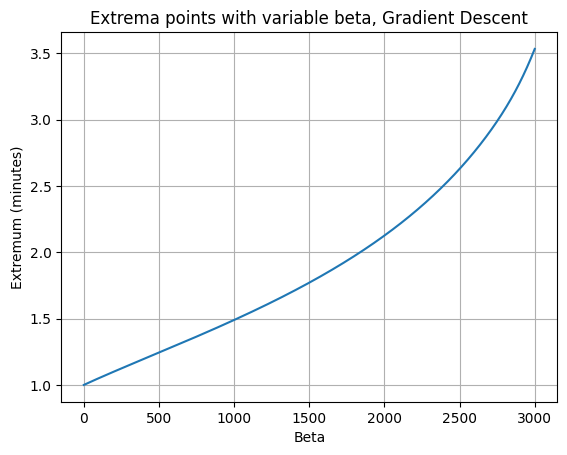

In [58]:
extrema_list = []

for i in range(1, 3000):
    beta = i
    optimizer.optimize("gradient", 5, iterations=150)
beta = 1
    
extrema_list = [e.get() for e in optimizer.extrema()]
all_points.append(extrema_list)

plt.plot([i for i in range(1, 3000)], extrema_list)
plt.title("Extrema points with variable beta, Gradient Descent")
plt.xlabel("Beta")
plt.ylabel("Extremum (minutes)")
plt.grid(True)
plt.show()
optimizer.clear()

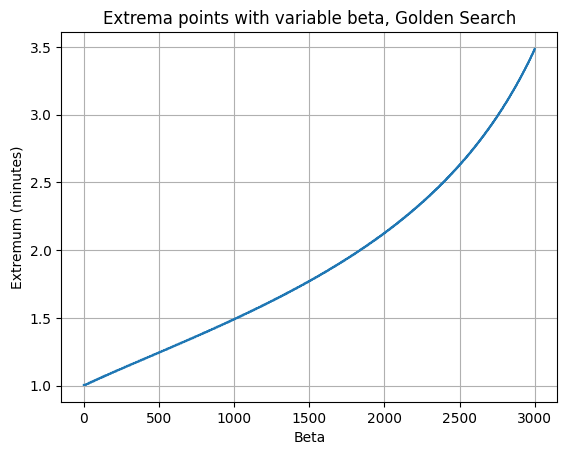

In [59]:
extrema_list = []

for i in range(1, 3000):
    beta = i
    # We already know all the minimas are between 1 and 4 by now.
    convex_range = optimizer.convexify(np.arange(1, 10, 0.1))
    optimizer.optimize("golden", interval=convex_range)
beta = 1
    
extrema_list = [e.get() for e in optimizer.extrema()]
all_points.append(extrema_list)

plt.plot([i for i in range(1, 3000)], extrema_list)
plt.title("Extrema points with variable beta, Golden Search")
plt.xlabel("Beta")
plt.ylabel("Extremum (minutes)")
plt.grid(True)
plt.show()
optimizer.clear()

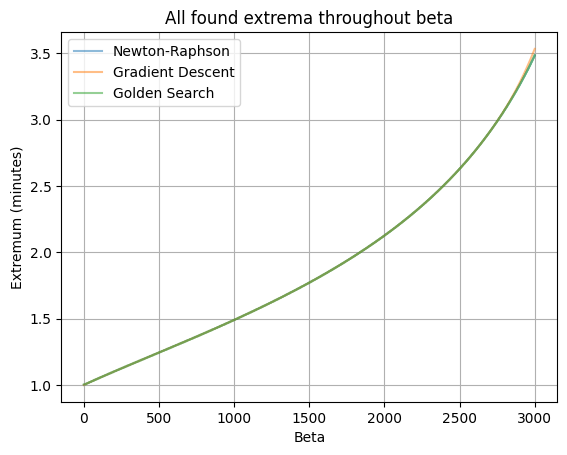

In [60]:
beta_range = list(range(1, 3000))
plt.plot(beta_range, all_points[0], label="Newton-Raphson", alpha=0.5)
plt.plot(beta_range, all_points[1], label="Gradient Descent", alpha=0.5)
plt.plot(beta_range, all_points[2], label="Golden Search", alpha=0.5)
plt.xlabel("Beta")
plt.ylabel("Extremum (minutes)")
plt.title("All found extrema throughout beta")
plt.grid(True)
plt.legend()
plt.show()
